In [2]:
import rasterio
import matplotlib.pyplot as plt
import rioxarray as rxr
from rasterio.enums import Resampling
import pandas as pd

In [3]:
lcz_path = 'data/LCZ/1c4b7a0b32a17d94e8542dd7e382b47aaf4d4d80.tif'
uhi_day_path = "out/DAY/UHI_day.tif"
uhi_night_path = "out/NIGHT/UHI_night.tif"

lcz_da = rxr.open_rasterio(lcz_path).sel(band=1)
lcz_da = lcz_da.squeeze()

uhi_day_da = rxr.open_rasterio(uhi_day_path).squeeze()
uhi_night_da = rxr.open_rasterio(uhi_night_path).squeeze()

In [4]:
lcz_matched = lcz_da.rio.reproject_match(
    uhi_day_da,
    resampling=Resampling.nearest
)

In [5]:
lcz = lcz_matched.values
uhi_day = uhi_day_da.values
uhi_night = uhi_night_da.values

lcz_flat = lcz.flatten()
day_flat = uhi_day.flatten()
night_flat = uhi_night.flatten()

In [6]:
df = pd.DataFrame({
    "LCZ": lcz_flat,
    "UHI_day": day_flat,
    "UHI_night": night_flat
})

df = df.dropna(subset=["LCZ", "UHI_day", "UHI_night"])
df = df[df["LCZ"] > 0]

In [7]:
lcz_names = {
    1: "Compact highrise",
    2: "Compact midrise",
    3: "Compact lowrise",
    4: "Open highrise",
    5: "Open midrise",
    6: "Open lowrise",
    7: "Lightweight lowrise",
    8: "Large lowrise",
    9: "Sparsely built",
    10: "Heavy industry",
    11: "Dense trees",
    12: "Scattered trees",
    13: "Bush/Scrub",
    14: "Low plants",
    15: "Bare rock/paved",
    16: "Bare soil/sand",
    17: "Water",
}

df["LCZ"] = df["LCZ"].astype(int)

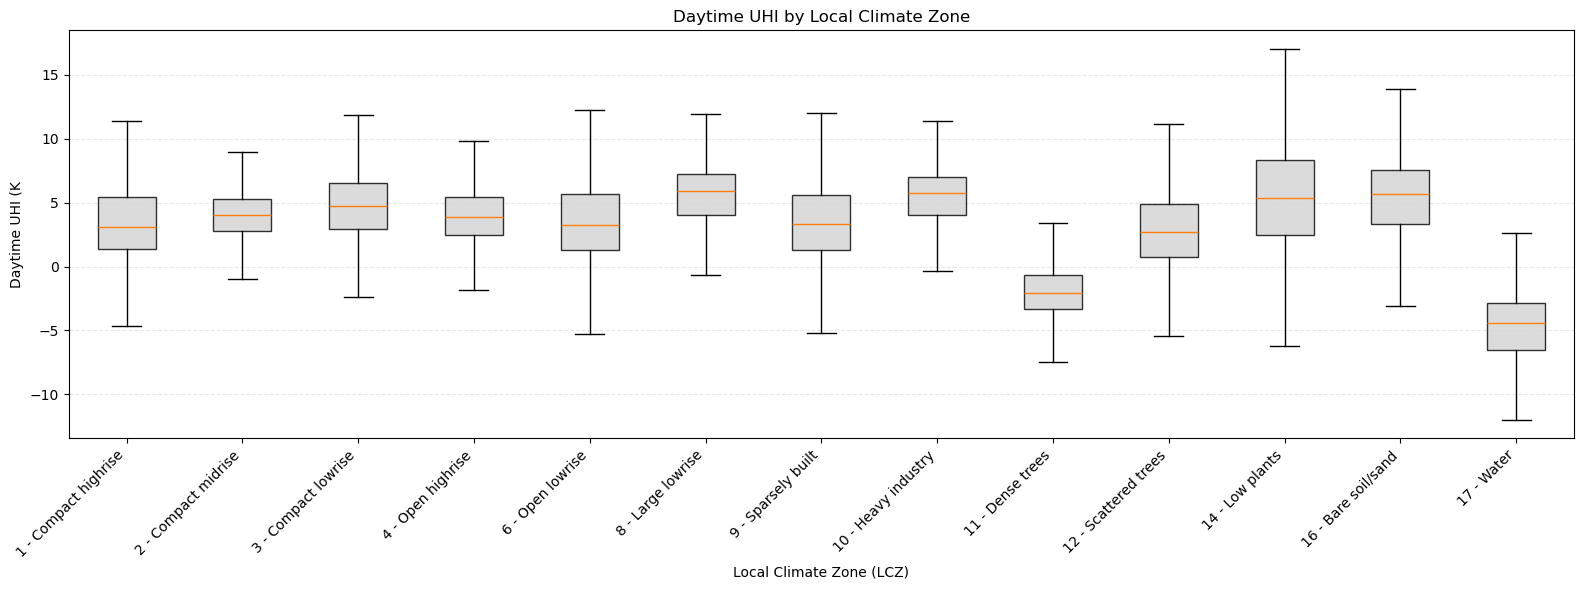

In [8]:
classes = sorted(df["LCZ"].unique())

# Collect UHI_day values per LCZ in numeric order
data_day = [df.loc[df["LCZ"] == c, "UHI_day"].values for c in classes]

plt.figure(figsize=(16, 6))

bp = plt.boxplot(
    data_day,
    positions=range(1, len(classes) + 1),
    patch_artist=True,
    showfliers=False,
)

for box in bp["boxes"]:
    box.set_facecolor("lightgray")
    box.set_alpha(0.8)

# Build labels "number – name"
labels = [f"{c} - {lcz_names.get(c, 'Unknown')}" for c in classes]
plt.xticks(range(1, len(classes) + 1), labels, rotation=45, ha="right")

plt.xlabel("Local Climate Zone (LCZ)")
plt.ylabel("Daytime UHI (K")
plt.title("Daytime UHI by Local Climate Zone")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

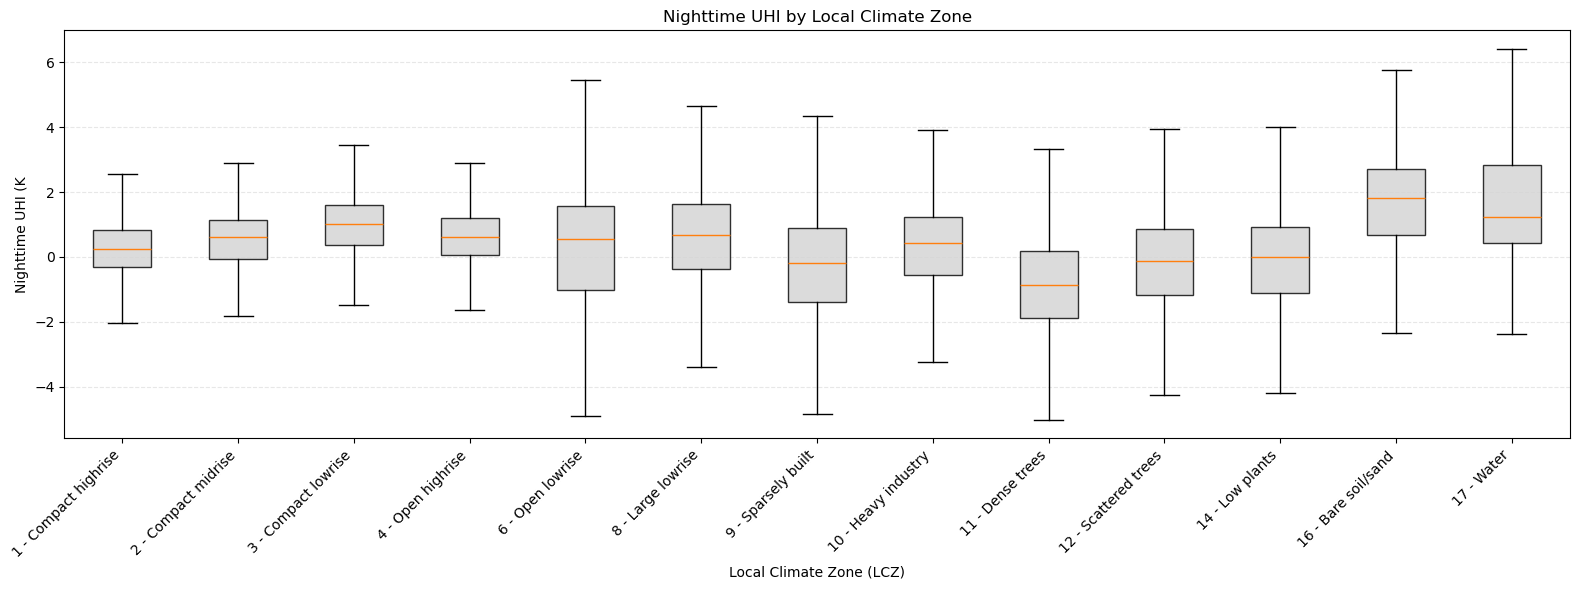

In [9]:
classes = sorted(df["LCZ"].unique())

# Collect UHI_day values per LCZ in numeric order
data_day = [df.loc[df["LCZ"] == c, "UHI_night"].values for c in classes]

plt.figure(figsize=(16, 6))

bp = plt.boxplot(
    data_day,
    positions=range(1, len(classes) + 1),
    patch_artist=True,
    showfliers=False,
)

for box in bp["boxes"]:
    box.set_facecolor("lightgray")
    box.set_alpha(0.8)

# Build labels "number – name"
labels = [f"{c} - {lcz_names.get(c, 'Unknown')}" for c in classes]
plt.xticks(range(1, len(classes) + 1), labels, rotation=45, ha="right")

plt.xlabel("Local Climate Zone (LCZ)")
plt.ylabel("Nighttime UHI (K")
plt.title("Nighttime UHI by Local Climate Zone")
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

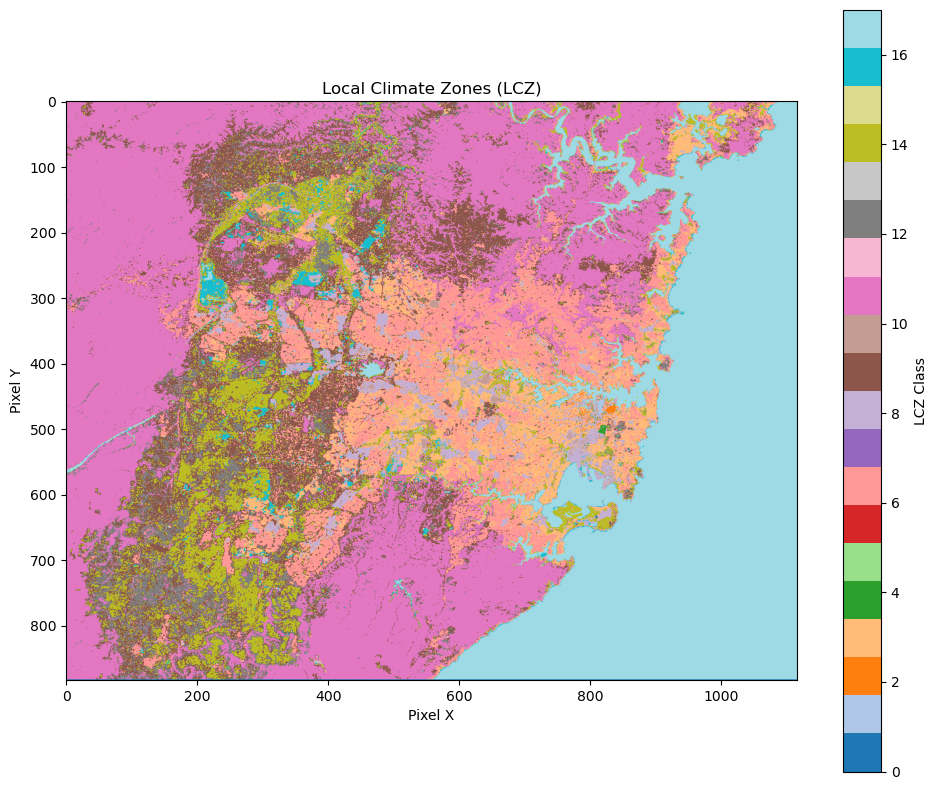

In [10]:
with rasterio.open("data/LCZ/1c4b7a0b32a17d94e8542dd7e382b47aaf4d4d80.tif") as src:
    arr = src.read(1)                # read first (or only) band
    cmap = "tab20"                   # LCZ colours usually categorical
    fig, ax = plt.subplots(figsize=(10, 8))

    im = ax.imshow(arr, cmap=cmap)
    plt.colorbar(im, ax=ax, label="LCZ Class")
    ax.set_title("Local Climate Zones (LCZ)")
    ax.set_xlabel("Pixel X")
    ax.set_ylabel("Pixel Y")
    plt.tight_layout()
    plt.show()